# MeCab
```
sudo apt install mecab
sudo apt install libmecab-dev
sudo apt install mecab-ipadic-utf8

git clone https://github.com/neologd/mecab-ipadic-neologd.git
cd mecab-ipadic-neologd
sudo ./bin/install-mecab-ipadic-neologd
pip install mecab-python


```

In [1]:
import MeCab

m = MeCab.Tagger("-r /etc/mecabrc")
print(m.parse("すもももももももものうち"))


すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
EOS



In [4]:
import MeCab
import requests
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/Google_Pixel"
m = MeCab.Tagger("-r /etc/mecabrc -Owakati" )

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
text = soup.find_all('p')[2].get_text()

parse_text = m.parse(text)
print(parse_text)

Google Pixel （ グーグル ピクセル ） は 、 Google が 設計 ・ 販売 し て いる スマート フォン 。 初代 Google Pixel は 2016 年 10 月 4 日 に 発表 さ れ 、 同月 10 月 20 日 に アメリカ合衆国 等 で 販売 さ れ た 。 



[('Pixel', 422), ('Google', 261), ('年', 151), ('月', 148), ('日', 146), ('a', 120), ('版', 107), ('-', 92), ('英語', 92), ('いる', 88)]


<AxesSubplot: xlabel='count'>

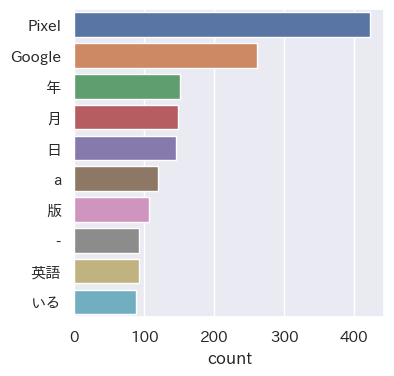

In [7]:
import MeCab
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re #正規表現
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

url = "https://ja.wikipedia.org/wiki/Google_Pixel"
m = MeCab.Tagger("-r /etc/mecabrc -Ochasen" )

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
# text = soup.find_all('p')[2].get_text()
text = soup.find("div", attrs={"id": "mw-content-text"}).get_text()

# parse_text = m.parse(text)
# print(parse_text)

node = m.parseToNode(text)
words = []
while node:
    hinshi = node.feature.split(',')[0] #品詞
    if hinshi in ['名詞', '動詞', '形容詞']:
        if not re.match(r"^[あ-ん0-9().[\]/]$", node.surface):
            words.append(node.surface)
    node = node.next

#単語数カウント
c = Counter(words)
print(c.most_common(10))

#グラフ出力
sns.set(context="notebook", font="IPAexGothic")
fig = plt.subplots(figsize=(4, 4))
sns.countplot(y=words, order=[i[0] for i in c.most_common(10)])
